# Step2:Data cleaning

In [2]:


import pandas as pd
import re
df=pd.read_csv("itjobstable.csv") #the orginal one before cleaning

# Delete Unnamed column
df=df.drop("Unnamed: 0", axis=1)
df.drop_duplicates(inplace=True)

#Clean Job Type
df["internship"]=df["job_type"].apply(lambda x: "1" if "Internship" in x else "0")
df["job_type"]=df["job_type"].apply(lambda x: x.replace("Permanent",""))
df["ft/pt"]=df["job_type"].apply(lambda x: "p" if "Part Time" in x else "f")

#Clean Industry
df["industry"]=df["industry"].apply(lambda x: str(re.search("(\w+)((\s)(\w+))?((\s)(\w+))?",x).group()))

df["data"]=df["title"].apply(lambda x: "1" if x.lower().find('data') >=0 else "0")
df["entry"]=df["career_level"].apply(lambda x: "1" if x.lower().find('entry level') >=0 else "0")

#Clean Salary
df["salary"]=df["salary"].apply(lambda x: x.replace(",","").replace("HK$",""))
df["salary"]=df["salary"].apply(lambda x: "Not Specified" if "Posted" in x else x)
df["salary"]=df["salary"].apply(lambda x: str(re.search('(\d+)((\s)(-)(\s)(\d+))?',x).group()) if "/" in x else x)
def average(x):
    if "-" in x:
        y = x.split(" - ")
        z=0
        for i in y:
            z+=int(i)
        return round(z/2)
    else:
        return x
df["salary"]=df["salary"].apply(lambda x: average(x))

#Clean post_date 
df["post_date"]=df["post_date"].apply(lambda x: re.search("\d.+",x).group())
df['post_date']=pd.to_datetime(df['post_date'])

#Clean qualification
df["qualification"]=df["qualification"].apply(lambda x: "Not Specified" if x=="(N/A)" else x)
 
#Clean Experience
def clean(x):
    if 'year' in x:
        return int(re.search('\d+',x).group())
    else:
        return "Not Specified"
df["experience"]=df["experience"].apply(lambda x: clean(str(x)))


In [3]:
analysis=df
analysis.head() 

,title,company,location,salary,post_date,career_level,qualification,experience,job_type,industry,internship,ft/pt,data,entry
0,Software Engineer (Web),Memoriki Limited,Kwun Tong,Salary provided,2021-04-12,Not Specified,Degree,1,"Full Time,",Information Technology,0,f,0,0
1,Sales Operations Assistant,HKT,Kowloon Bay,Not Specified,2021-04-12,Entry Level,Non-Degree Tertiary,1,"Full Time,",Telecommunication,0,f,0,1
2,IT Technical Support,Human Health (H.K) Limited,Tsim Sha Tsui,Salary negotiable,2021-04-12,Entry Level,Non-Degree Tertiary,1,"Full Time,",Medical,0,f,0,1
3,"Software Engineer, Frontend",Aigens Technology Limited,Kwun Tong Area,Salary provided,2021-04-12,Not Specified,Not Specified,Not Specified,"Full Time,",Information Technology,0,f,0,0
4,"Manager, Software Development",Principal Insurance Company (Hong Kong) Limited,Kwun Tong,Not Specified,2021-04-12,Middle,Degree,10,"Full Time, Part Time,",Insurance,0,p,0,0


new Q1. Find the job opening for different career level (Entry, Middle, Senior, Top…)

AxesSubplot(0.125,0.125;0.775x0.755)


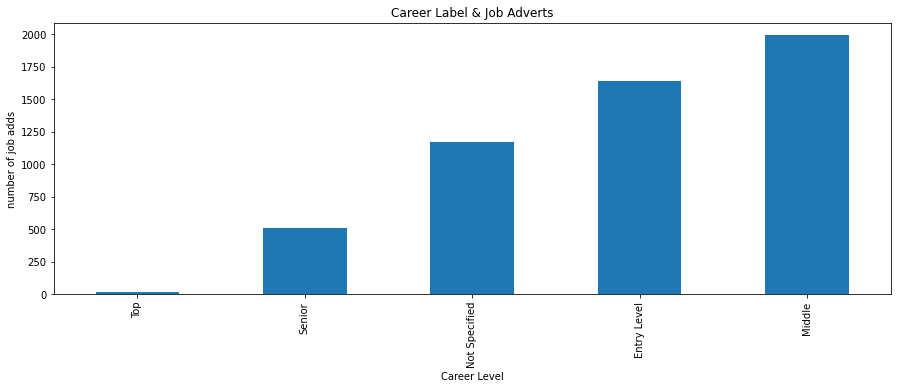

In [9]:
carrer_level = analysis.career_level.value_counts().sort_values()
print(carrer_level.plot.bar(title= "Career Label & Job Adverts",xlabel="Career Level",  ylabel="number of job adds", figsize=(15,5)))


AxesSubplot(0.135,0.125;0.755x0.755)


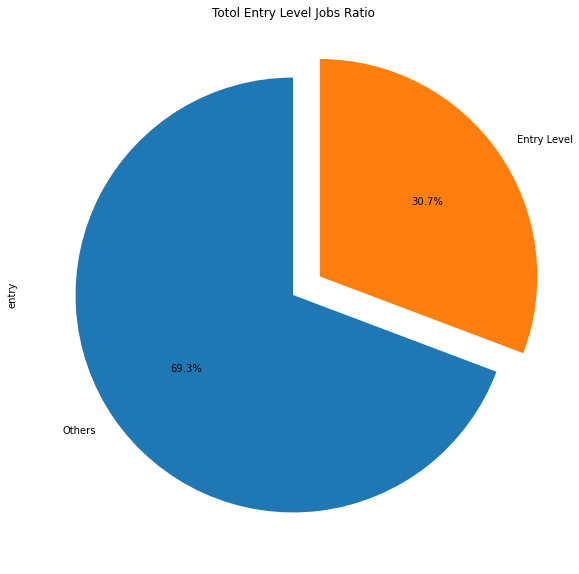

In [5]:
analysis["entry"].value_counts()
entry_percent = analysis["entry"].value_counts().plot.pie(y=analysis.index,
                                                    title="Totol Entry Level Jobs Ratio",
                                                    labels=["Others", "Entry Level"], #to label all items
                                                    explode=(0, 0.15), #to seperate
                                                    startangle=90, #???
                                                    autopct="%1.1f%%", #to present %
                                                    figsize=(10,10))
print(entry_percent)

new Q2. Find the number of internship

0    5252
1      70
Name: internship, dtype: int64


<AxesSubplot:title={'center':'The number of internship provided in a month'}, ylabel='Number of internship'>

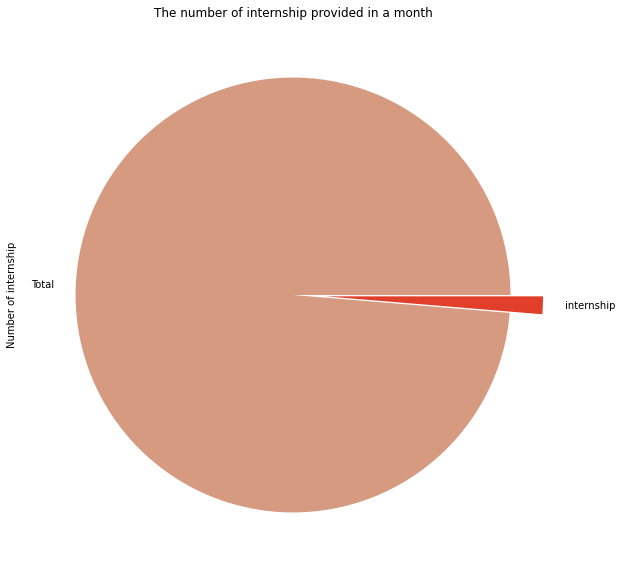

In [ ]:
pp = analysis.internship.value_counts()
print
print(pp)
#to count the internship posts after removing the duplicate?
pp.plot(kind="pie", figsize=(15,10), ylabel="Number of internship", xlabel="Whole IT sector", labels=['Total','internship'], explode=(0,0.15),colors= ['#D69A80','#E13F29'], title="The number of internship provided in a month",rot=45)

new Q3. Find the top 10 industries with most entry level job opening

In [10]:
entry_no_it = analysis.groupby("entry")["industry"].value_counts().sort_values()[77:] #why 77
print(entry_no_it)

entry  industry                  
1      Trading and Distribution        26
0      Professional Services           28
       Education                       30
       Management Consultancy          31
1      Education                       32
0      Property Development            34
       Advertising                     34
       Media                           36
1      Human Resources Management      38
0      Manufacturing                   39
       Trading and Distribution        42
1      Wholesale                       46
       Banking                         46
       Others                          54
0      Freight Forwarding              55
       Insurance                       59
1      Engineering                     66
0      Wholesale                       78
       Engineering                     89
1      Financial Services              93
0      Others                         101
1      Telecommunication              108
0      Banking                        123


In [27]:
analysis['industry'].nunique()

58

In [28]:
analysis.groupby("entry")["industry"].nunique() #to find industries has entry level

entry
0    56
1    49
Name: industry, dtype: int64

<AxesSubplot:title={'center':'Top 10 Industries with maximum number of job adverts in a month '}, ylabel='Industries'>

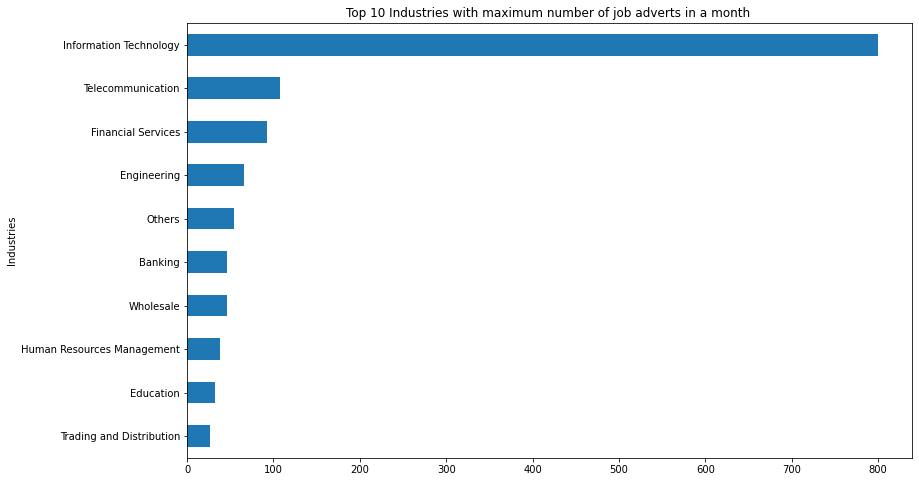

In [ ]:
entry_no_it = analysis.groupby("entry")["industry"].value_counts().sort_values()[77:] #why 77? total is 49x2, to find the last 10, For the first 10

entry_no_it.loc["1"].plot.barh(title= "Top 10 Industries with maximum number of job adverts in a month ",xlabel="Industries",  ylabel="number of job adds", figsize=(13,8))

#.loc['1'] return entry level rows
#barh : horizontal

<AxesSubplot:title={'center':'Top 10 Industries with maximum number of job adverts except I.T. Industry'}, ylabel='Industries'>

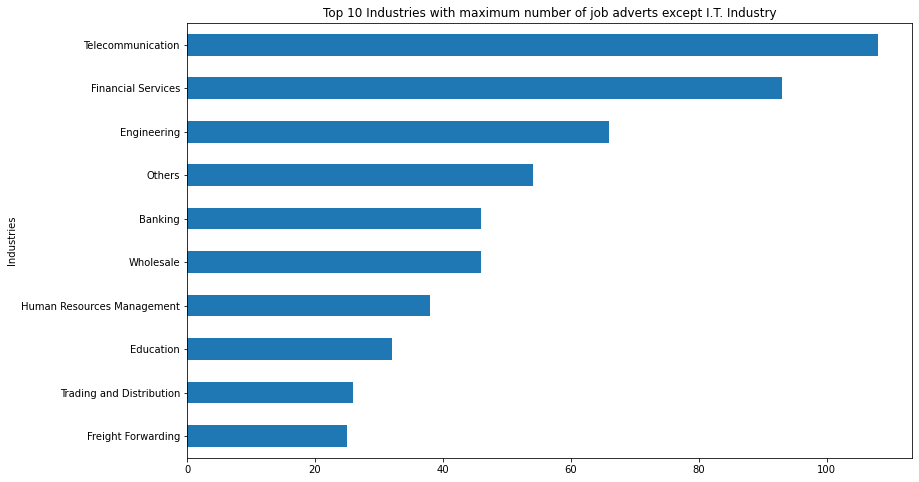

In [24]:
entry_no_it = analysis.groupby("entry")["industry"].value_counts().sort_values()[76:-2] #-2 skip the last 2 rows

entry_no_it.loc["1"].plot.barh(xlabel="Industries", title="Top 10 Industries with maximum number of job adverts except I.T. Industry", figsize=(13,8))

new Q4. Average salary of entry level jobs in each industry

<ipython-input-8-6326634f7a3e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ent_w_num_sal["salary"]=ent_w_num_sal["salary"].astype(int)


<AxesSubplot:title={'center':'Average Salary for each Industry in Entry Level job'}, xlabel='industry', ylabel='salary(HK$)'>

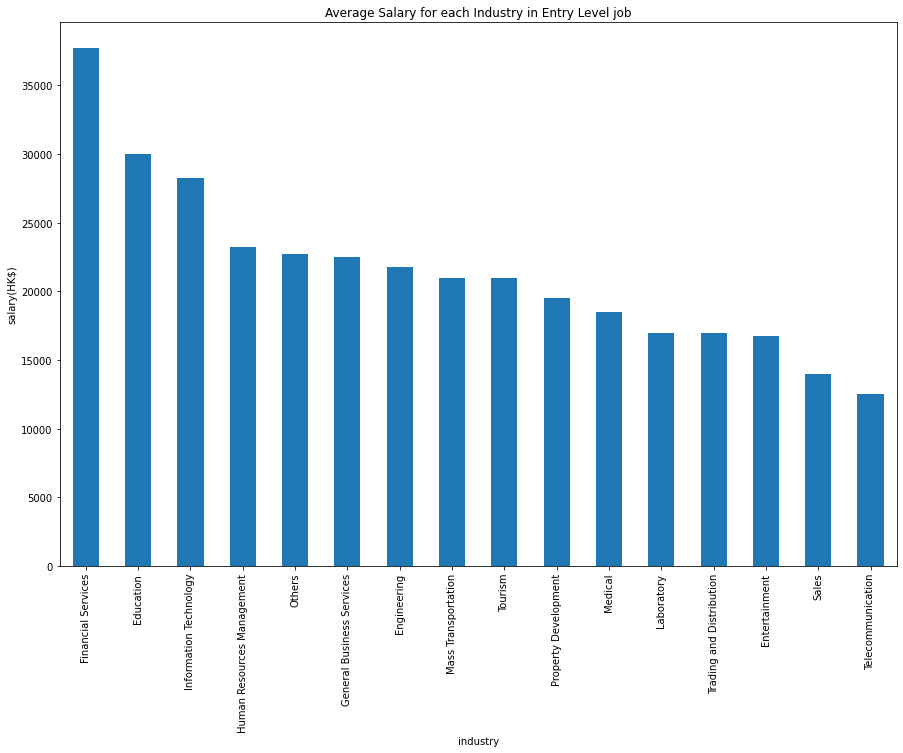

In [ ]:
entry=analysis[analysis["career_level"]=="Entry Level"]

ent_w_num_sal=entry[pd.to_numeric(entry['salary'],errors='coerce')>=0]
#  just count the number but not 'not specified'


ent_w_num_sal["salary"]=ent_w_num_sal["salary"].astype(int) #change from str to int, string number

ent_ind_sal=round(ent_w_num_sal.groupby("industry")["salary"].mean().sort_values(ascending=False)) # calculation : groupby industry, and find mean, change to descending number 

ent_ind_sal.plot(kind="bar", figsize=(15,10), ylabel="salary(HK$)", title="Average Salary for each Industry in Entry Level job")
#plot graph


new Q5. Find the qualifications needed to land an entry level job

<AxesSubplot:title={'center':'Qualification needed for Entry Level Job'}, ylabel='Entry Level Job Count'>

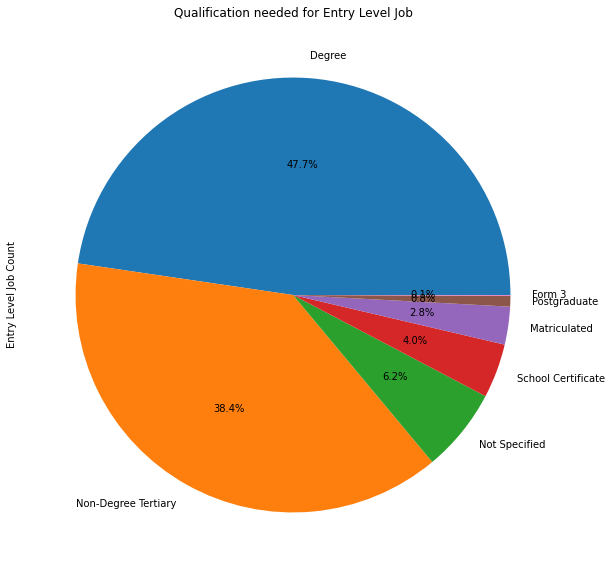

In [ ]:
rp= analysis[analysis["career_level"]=="Entry Level"]["qualification"].value_counts()

rp.plot(kind="pie", figsize=(15,10), ylabel="Entry Level Job Count", xlabel="Qualification", autopct="%1.1f%%", title="Qualification needed for Entry Level Job",rot=45)

new Q6. Average Salary of entry level jobs with different qualifications

<ipython-input-10-96ef5dff50c5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ent_w_num_sal["salary"]=ent_w_num_sal["salary"].astype(int)


<AxesSubplot:title={'center':'Average Salary for each Qualification within Entry Level job'}, xlabel='Qualifications', ylabel='Salary(HK$)'>

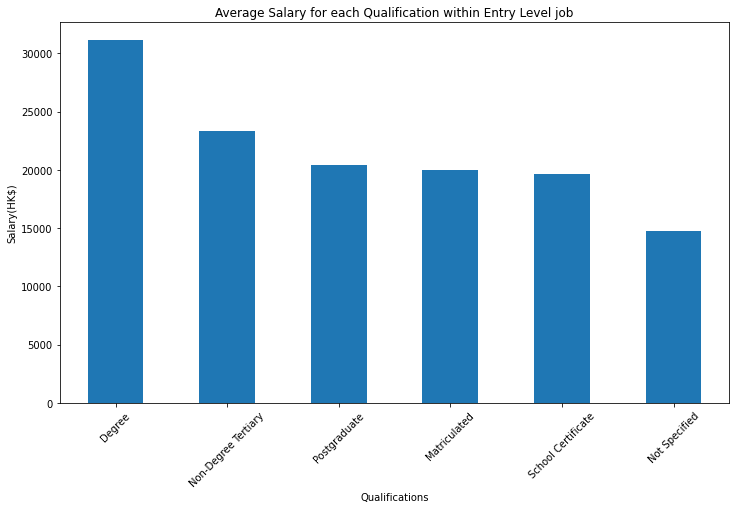

In [ ]:
entry=analysis[analysis["career_level"]=="Entry Level"]

ent_w_num_sal=entry[pd.to_numeric(entry['salary'],errors='coerce')>=0]



ent_w_num_sal["salary"]=ent_w_num_sal["salary"].astype(int)
ent_deg_sal=round(ent_w_num_sal.groupby("qualification")["salary"].mean().sort_values(ascending=False))

ent_deg_sal.plot(kind="bar",rot=45, figsize=(12,7),xlabel="Qualifications", ylabel="Salary(HK$)", title="Average Salary for each Qualification within Entry Level job")
#ent_deg_sal=ent_w_num_sal.groupby("qualification")["salary"].plot.kde(figsize=(10,5))





new Q7. What is job market looking for regarding Experience?


<AxesSubplot:title={'center':'Job Experiences advertised'}, xlabel='Year of experience required', ylabel='Number of Adds'>

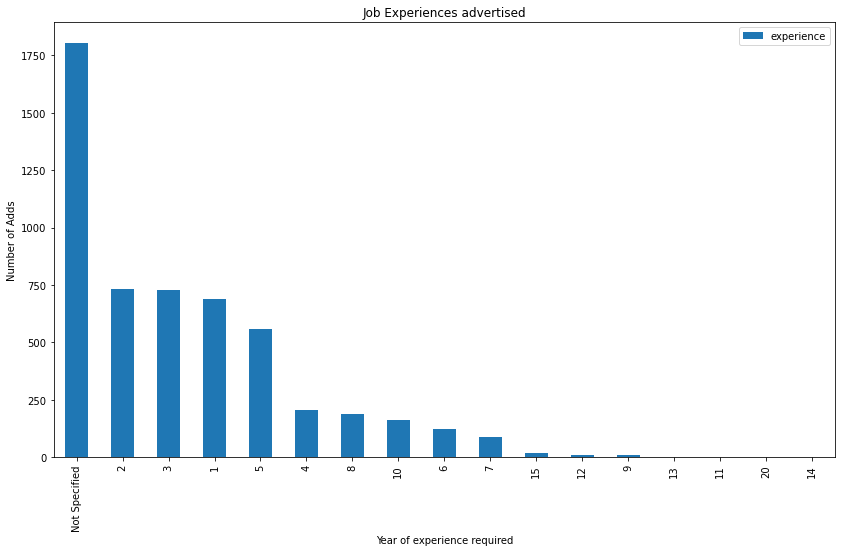

In [14]:
mm=analysis.experience.value_counts() #count the values
mm.sort_values()  #sort values
nn=pd.DataFrame(mm) #change it to dataframe

nn.plot.bar(ylabel="Number of Adds", title="Job Experiences advertised", xlabel="Year of experience required", figsize=(14,8))

#you can change to plot.line as well


new Q8. The correlation between year of experience and salary

0.7461070785328835


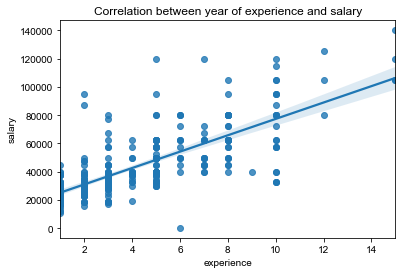

In [ ]:
from matplotlib import pyplot #use matplotlib to create a regression graph
import seaborn as sns
xxx=analysis[(pd.to_numeric(analysis['salary'],errors='coerce')>=0) & (pd.to_numeric(analysis['experience'],errors='coerce')>0) ]

column_1 = xxx["salary"]
column_2 = xxx["experience"]


column_1=pd.to_numeric(column_1) #why to numeric?
column_2=pd.to_numeric(column_2)
correlation = column_1.corr(column_2)
print(correlation)


p = sns.regplot(y = column_1 , x = column_2).set_title('Correlation between year of experience and salary')

sns.set({'figure.figsize':(10,10)})

